In [10]:
# GPT-2 Small Specifications
num_layers = 12
num_heads = 12
vocab_size = 55236
hidden_dim = 768
seq_length = 2048

# Memory for token embeddings
token_embeddings = vocab_size * hidden_dim * 4  # 4 bytes per float32

# Memory for position embeddings
position_embeddings = seq_length * hidden_dim * 4

# Memory for layer parameters (assuming layer normalization, attention, and feedforward for each layer)
layer_norm = 2 * hidden_dim * 4  # 2 for scale and bias
attention = 4 * hidden_dim * hidden_dim * 4  # Query, Key, Value, and Output matrices
feedforward = 4 * hidden_dim * hidden_dim * 4  # Two linear layers, typically 4x expansion
layer_params = (layer_norm + attention + feedforward) * num_layers

# Memory for attention cache
attention_cache = num_layers * num_heads * seq_length * (hidden_dim // num_heads) * 2 * 4  # Key and Value states

# Memory for activations (rough estimate, varies during inference)
activations = seq_length * hidden_dim * 4 * 3  # Rough estimate for main activations

# Total memory
total_memory = token_embeddings + position_embeddings + layer_params + attention_cache + activations

# Convert to GB
total_memory_gb = total_memory / (1024**3)

print(f"Estimated memory usage: {total_memory_gb:.2f} GB")

Estimated memory usage: 0.53 GB


In [6]:
# save in a format readable by c
import numpy as np
import torch

data = torch.load('pytorch_model.bin', map_location='cpu')

In [7]:
for i in data.keys():
    print(i, data[i].shape)

wte.weight torch.Size([50257, 768])
wpe.weight torch.Size([1024, 768])
h.0.ln_1.weight torch.Size([768])
h.0.ln_1.bias torch.Size([768])
h.0.attn.bias torch.Size([1, 1, 1024, 1024])
h.0.attn.c_attn.weight torch.Size([768, 2304])
h.0.attn.c_attn.bias torch.Size([2304])
h.0.attn.c_proj.weight torch.Size([768, 768])
h.0.attn.c_proj.bias torch.Size([768])
h.0.ln_2.weight torch.Size([768])
h.0.ln_2.bias torch.Size([768])
h.0.mlp.c_fc.weight torch.Size([768, 3072])
h.0.mlp.c_fc.bias torch.Size([3072])
h.0.mlp.c_proj.weight torch.Size([3072, 768])
h.0.mlp.c_proj.bias torch.Size([768])
h.1.ln_1.weight torch.Size([768])
h.1.ln_1.bias torch.Size([768])
h.1.attn.bias torch.Size([1, 1, 1024, 1024])
h.1.attn.c_attn.weight torch.Size([768, 2304])
h.1.attn.c_attn.bias torch.Size([2304])
h.1.attn.c_proj.weight torch.Size([768, 768])
h.1.attn.c_proj.bias torch.Size([768])
h.1.ln_2.weight torch.Size([768])
h.1.ln_2.bias torch.Size([768])
h.1.mlp.c_fc.weight torch.Size([768, 3072])
h.1.mlp.c_fc.bias torc

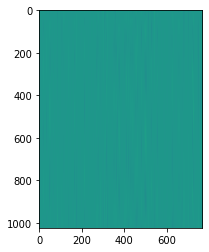

In [9]:
# plot wpe.weight

import matplotlib.pyplot as plt
wpe = data['wpe.weight'].numpy()

plt.imshow(wpe)

In [3]:
data['h.0.attn.c_proj.weight'].shape

torch.Size([768, 768])

In [9]:
import os
os.makedirs("gpt_weights", exist_ok=True)
for key in data.keys():
    if "attn.c_attn" in key:
        # split to q, k, v
        q, k, v = np.split(data[key].numpy(), 3, axis=-1)
        print(q.shape, k.shape, v.shape, data[key].shape)
        # q.tofile(f"gpt_weights/{key}.q.bin")
        # k.tofile(f"gpt_weights/{key}.k.bin")
        # v.tofile(f"gpt_weights/{key}.v.bin")
    else:
        pass
        # data[key].numpy().tofile(f"gpt_weights/{key}.bin")
        # print(data[key].numpy().shape)

# save transpose of wte.weight as etw.weight

etw = data['wte.weight'].numpy().T
etw.tofile("gpt_weights/etw.weight.bin")

(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 768) torch.Size([768, 2304])
(768,) (768,) (768,) torch.Size([2304])
(768, 768) (768, 768) (768, 76

In [2]:
model.config._attn_implementation = 'eager'

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.42.4",
  "use_cache": true,
  "vocab_size": 50257
}

In [1]:
from transformers import GPT2Tokenizer, GPT2Model
# import model for text generation
from transformers import AutoModelForCausalLM

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')
# model = GPT2Model.from_pretrained('gpt2')

In [3]:
text = "Hello, my name is John. I'm"
encoded_input = tokenizer(text, return_tensors='pt')
# print(encoded_input['input_ids'].shape)
output = model(**encoded_input, output_hidden_states=True)
tokenizer.decode(output.logits.argmax(2)[0][-1]), output.logits.argmax(2)[0][-1], encoded_input

(' a',
 tensor(257),
 {'input_ids': tensor([[15496,    11,   616,  1438,   318,  1757,    13,   314,  1101]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])})

In [41]:
output['hidden_states'][0][0].detach().numpy().tofile("gpt_weights/input.bin")
output.logits[0].detach().numpy().tofile("gpt_weights/output.bin")

In [12]:
out = model.generate(encoded_input['input_ids'], max_length=109, do_sample=False)
out, tokenizer.decode(out[0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


(tensor([[15496,    11,   616,  1438,   318,  1757,    13,   314,  1101,   257,
           6260,    11,   290,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314]]),
 "Hello, my name is John. I'm a writer, and I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writer. I'm a writ

In [9]:
out = [257, 6260, 11, 290, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314, 1101, 257, 6260, 13, 314]
out2 = [257,
           6260,    11,   290,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101,
            257,  6260,    13,   314,  1101,   257,  6260,    13,   314,  1101]

In [11]:
out == out2

False

In [10]:
for i in range(len(out)):
    if out[i] != out2[i]:
        print(i, out[i], out2[i])

In [8]:
tokenizer.decode([257,6260,11,290,314,1101,257,6260,13,314,1101,257,6260,13,314,1101,257,6260,13,314,1101,257,6260,13])

" a writer, and I'm a writer. I'm a writer. I'm a writer. I'm a writer."